## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [56]:
import pandas as pd
import numpy as np
df=pd.read_csv("banklist.csv")
df.head()
print(len(df))

555


## Question 1 (20 points)

In [43]:
#Look at the data set: First, make sure there are no missing values in
#any of the categorical columns.If there are, replace them with
#a 'M' value. Then, consider that Acquiring Institution column is the institution that holds various banks.
#What are the top 4 acquiring institutions?$

Bank Name                0
City                     0
ST                       0
CERT                     0
Acquiring Institution    0
Closing Date             0
Updated Date             0
dtype: int64
Bank Name                0
City                     0
ST                       0
Acquiring Institution    0
dtype: int64


138

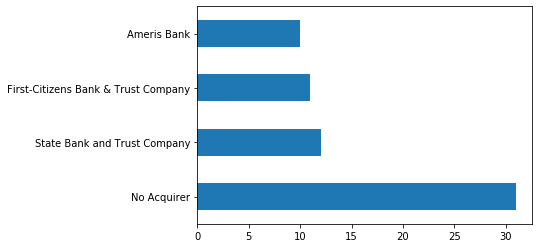

In [57]:
#Look at the data set: First, make sure there are no missing values in
#any of the categorical columns.If there are, replace them with
#a 'M' value.

#checking missing values in the whole dataset. 
print(df.isnull().sum())# no missing values in this dataset



#the assingment said to specifically look at categorical vars. SO doing that too
df_categorical = df[['Bank Name','City', 'ST', 'Acquiring Institution']]
#creating object with all categoricals vars
print(df_categorical.isnull().sum())
#there are no missing values in the categorical variables. 

#assigning null values with M should they be missing (which they aren't ) 
#in the categorical variables. 
df_cat_clean = df_categorical.fillna('M')


#Then, consider that Acquiring Institution column 
#is the institution that holds various banks.
#What are the top 4 acquiring institutions?

#assigning new object to get value counts for each 
#of the Acquiring Institution


Ac_inst_count = df['Acquiring Institution'].value_counts()
Ac_inst_count.sort_values(ascending=False).iloc[0:4] # printing top 4 


#plotting the top Acquiring Inst.
import matplotlib.pyplot as plt
Ac_inst_count[:4].plot(kind='barh', rot=0)



#stats summary of dataset. 
df.describe()


#How many city names start with the letter 'A'? 

#subsetting the categorical dataset that I made earlier to do this. 
df_city = df_categorical["City"]
#Selecting the City column in the categroical database. 
#using starts with to identify all A's cities, then summing those
df_A = df_city.str.startswith("A")
df_A.sum()#thre are 34 cities that start with A


# how many cities don't start with A? 

new_cities = []#creating empty list to hold new cities
for city in df_city:# the loop is iterating over all cities in the city column
    #it is looking for all starting letters excluding A
    if city.startswith(tuple('BCDEFGHIJKLMNOPQRSTUVWXYZ')):
        new_cities.append(city)#adding those cities to the empty list
new_cities.sort()#sorting 

new_cities = pd.DataFrame(new_cities)


new_cities.shape #there are 521 cities that do not start with the letter A


#What are the cities whose names consist of 2 words and how many are there?
two_word_cities = df_city.str.contains(' ')
two_word_cities.sum()
#there are 138 cities with 2 words in them.

In [45]:
#How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [46]:
#answer here

In [47]:
#What are the cities whose names consist of 2 words and how many are there?

In [48]:
#answer here

## Question 2 (50 points)

In [49]:
#use various apply and group by methods studied in class to obtain the city for each state corresponding to the smallest
#number of certificates (CERT column). Then, display only the city, state combinations along with the number of certificates
#(data frame with 3 columns) for which the Acquiring Institution contains 3 words (for this exercise, you can count symbols
#like & and others as words for each Acquiring Institution)

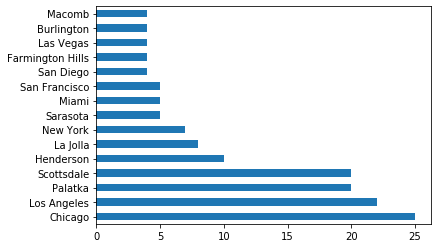

In [58]:
df.groupby(['ST', "City"]).agg({"CERT":[min]})
space_count = df['Acquiring Institution'].str.count(" ")
space_count = pd.DataFrame(space_count)
space_count.rename(
  columns={
    "Acquiring Institution" : 'Acq. Inst. Space Count'
  },
  inplace=True
)
df_3w = pd.concat([df, space_count], axis=1)
df_3word = pd.DataFrame(df_3w, columns=['City', 'ST', 'CERT', 'Acquiring Institution',"Acq. Inst. Space Count" ])
only_3 = df_3word.loc[df_3word['Acq. Inst. Space Count']==2]
only_3.shape
only_3[["City", "ST", "CERT"]]
a=only_3["ST"].value_counts()
a[:15].sort_values(ascending=False).plot(kind='barh',rot=0)
b=only_3["City"].value_counts()
b[:15].sort_values(ascending=False).plot(kind='barh',rot=0)

## Question 3 (30 points)

In [51]:
#finally, let us obtain a distribution of CERT column across all records. Then, let us subset the original data frame to 
#only consider records for which CERT is smaller than 10th percentile of the total. Then, for these records, use pivot table
#method to obtain the min, max, and average CERT for each ST combination for which the number of records is 
#more than 1. We will have index for 
#state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
#you do not have a multi-level data frame! Finally, display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, and the corresponding 3 summary statistics will be the 3 bars - stacked
#bar plot.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



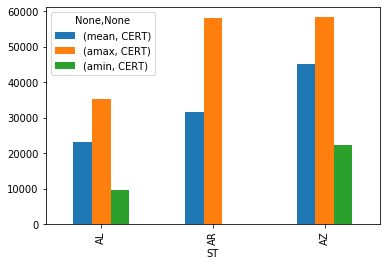

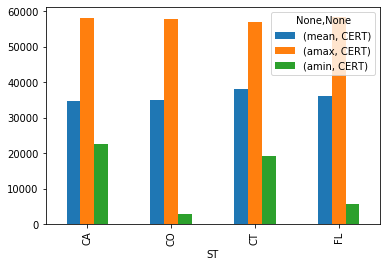

In [86]:
# We will have index for 
#state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
#you do not have a multi-level data frame! 
#Finally, display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, 
#and the corresponding 3 summary statistics will be the 3 bars - stacked
#bar plot.



#distribution of CERT column across all records
dist_cert =df['CERT'].describe(percentiles=[.1])
# dist_cert.plot(kind='bar',rot=True)
#THe maximum value is ~ 60000, the min appears to be 0 and the average is about 30000



# subset the original data frame to 
#only consider records for which CERT is smaller than 10th percentile of the total.

#First: isloating CERT column
df_cert = df["CERT"] 


#Then using logical to return T/F for rows where the CERT is less than the 10th%ile 
#(10091.60)
df_lessthan10 = df_cert < 10091.60


#Turning that into a workable DF
df_lessthan10 =pd.DataFrame(df_lessthan10)


#renaming the column from CERT to CERTS logical against less 10th percetile
df_lessthan10.rename(
  columns={
    "CERT" : 'CERTS logical against less 10th percetile'
  },
  inplace=True
)


#concatenating the T/F object onto the main DF
df_tf = pd.concat([df, df_lessthan10], axis = 0)


#Subsetting data for values where < 10th% = true
df_CERT_Less = df_tf.loc[df_tf['CERTS logical against less 10th percetile']== True]


Cert_stats = pd.DataFrame(Cert_stats)


#use pivot table
#method to obtain the min, max, and average CERT for each ST combination for which the number of records is 
#more than 1.
table = pd.pivot_table(df,
               index ="ST",
               values= "CERT",
               aggfunc =[np.mean,np.max,np.min])
               
table              
#Finally, display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, 
#and the corresponding 3 summary statistics will be the 3 bars - stacked
#bar plot.

#displaying first 3 states 
#the first 3 states each have their min/mean/max equal to one another. 
table[:3].plot(kind= 'bar')


# I want to see those that dont, so i am going to extend the plot
table[3:7].plot(kind= 'bar')#the values after the first 3 include a variation across the distribution of mean/min/max. 